In [25]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Read the preprocessed data
X_train = pd.read_csv('../data/processed/X_train.csv')
X_val = pd.read_csv('../data/processed/X_val.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train_resampled = pd.read_csv('../data/processed/y_train.csv').iloc[:, 0]  # Convert to Series
y_val_resampled = pd.read_csv('../data/processed/y_val.csv').iloc[:, 0]      # Convert to Series
y_test  = pd.read_csv('../data/processed/y_test.csv' )
# Define a range of hyperparameters to search over
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a LogisticRegression model with regularization
model = LogisticRegression(max_iter=1000, penalty='l2')

# Use GridSearchCV to find the best hyperparameters using cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_resampled)

# Get the best model with the selected hyperparameters
best_model = grid_search.best_estimator_

# Train the best model on the entire training data
best_model.fit(X_train, y_train_resampled)

# Evaluate the model on the validation set
validation_accuracy = best_model.score(X_val, y_val_resampled)
print("Validation Accuracy:", validation_accuracy)
# Evaluate the model on the test set
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.9626147201727551
Test Accuracy: 0.9613758992805755


In [26]:
# Get the coefficients and feature names
coefficients = best_model.coef_[0]
feature_names = X_train.columns

# Create a DataFrame to show the coefficients for each feature
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute value of coefficients
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
sorted_coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

print(sorted_coef_df)

                Feature  Coefficient  Absolute Coefficient
1               Min_per    -3.542694              3.542694
38                adrtg    -3.340078              3.340078
8               AST_per    -2.779246              2.779246
13                twoPM     2.558382              2.558382
42                 obpm     2.441382              2.441382
14                twoPA    -2.395607              2.395607
20              stl_per    -2.205659              2.205659
34  dunksmiss_dunksmade     2.131396              2.131396
51                  ast     2.092174              2.092174
3                   usg     2.086758              2.086758
30      midmade_midmiss     2.043614              2.043614
5                TS_per    -1.923499              1.923499
23                adjoe    -1.795148              1.795148
27              rimmade    -1.754931              1.754931
29              midmade    -1.675424              1.675424
22               porpag     1.623246              1.6232

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the preprocessed data
X_train = pd.read_csv('../data/processed/X_train.csv')
X_val = pd.read_csv('../data/processed/X_val.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train_resampled = pd.read_csv('../data/processed/y_train.csv').iloc[:, 0]
y_val_resampled = pd.read_csv('../data/processed/y_val.csv').iloc[:, 0]
y_test = pd.read_csv('../data/processed/y_test.csv')
coefficients = pd.DataFrame({
    'Feature': ['adrtg', 'Min_per', 'AST_per', 'twoPM', 'obpm', 'twoPA', 'stl_per', 'dunksmiss_dunksmade', 'ast',
                'usg', 'midmade_midmiss', 'TS_per', 'adjoe', 'rimmade', 'midmade', 'porpag', 'drtg', 'dgbpm',
                'dunksmade', 'stops', 'ogbpm', 'eFG', 'dbpm', 'TO_per', 'pfr', 'mp', 'rimmade_rimmiss', 'TPM',
                'dunks_ratio', 'GP', 'bpm', 'Rec_Rank', 'twoP_per', 'FT_per', 'FTA', 'mid_ratio', 'dreb', 'DRB_per',
                'dporpag', 'blk_per', 'gbpm', 'stl', 'oreb', 'ast_tov', 'FTM', 'ftr', 'rim_ratio', 'blk', 'treb',
                'TPA', 'TP_per', 'pick', 'ORB_per', 'pts', 'Ortg'],
    'Absolute Coefficient': [3.340078, 3.542694, 2.779246, 2.558382, 2.441382, 2.395607, 2.205659, 2.131396,
                             2.092174, 2.086758, 2.043614, 1.923499, 1.795148, 1.754931, 1.675424, 1.623246,
                             1.584561, 1.505753, 1.505267, 1.457823, 1.264243, 1.249943, 1.243752, 1.079634,
                             1.048334, 0.984514, 0.927019, 0.904347, 0.875047, 0.861829, 0.839320, 0.789912,
                             0.597381, 0.575458, 0.528011, 0.525412, 0.498164, 0.436940, 0.426927, 0.421211,
                             0.377454, 0.369609, 0.337747, 0.287269, 0.248238, 0.246318, 0.204145, 0.192189,
                             0.168635, 0.151730, 0.151492, 0.139234, 0.088484, 0.086800, 0.042992]
})

# Set a threshold for absolute coefficient values
threshold = 0.04

# Select features with absolute coefficient values above the threshold
selected_features = coefficients[coefficients['Absolute Coefficient'] > threshold]['Feature'].tolist()

# Create DataFrames with selected features
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

# Initialize XGBoost model
xgb_model_2 = XGBClassifier()

# Train the model on the training data
xgb_model_2.fit(X_train_selected, y_train_resampled)

# Predict on validation set
val_predictions = xgb_model_2.predict(X_val_selected)
val_accuracy = accuracy_score(y_val_resampled, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Predict on test set
test_predictions = xgb_model_2.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)


Validation Accuracy: 0.9799352168436206
Test Accuracy: 0.9829586330935252


In [81]:
best_threshold = None
best_val_accuracy = 0

# Iterate through different threshold values
for threshold in [0.04, 0.08, 0.1, 0.5,0.6, 0.7, 0.8, 0.9, 1.0,1.1, 1.15, 1.2, 1.24, 1.28, 1.3, 1.35, 1.40, 1.45,1.5, 1.55, 1.65, 1.70, 1.75, 1.80, 1.90, 1.95, 2, 2.02, 2.07, 2.10, 2.12, 2.17, 2.20, 2.25, 2.30, 2.40, 2.5]:
    selected_features = coefficients[coefficients['Absolute Coefficient'] > threshold]['Feature'].tolist()

    X_train_selected = X_train[selected_features]
    X_val_selected = X_val[selected_features]

    xgb_model = XGBClassifier()
    xgb_model.fit(X_train_selected, y_train_resampled)

    val_predictions = xgb_model.predict(X_val_selected)
    val_accuracy = accuracy_score(y_val_resampled, val_predictions)
    
    print(f"Threshold: {threshold:.3f}, Validation Accuracy: {val_accuracy:.4f}")
    
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_threshold = threshold

print("Best Threshold:", best_threshold)


Threshold: 0.040, Validation Accuracy: 0.9799
Threshold: 0.080, Validation Accuracy: 0.9764
Threshold: 0.100, Validation Accuracy: 0.9745
Threshold: 0.500, Validation Accuracy: 0.9598
Threshold: 0.600, Validation Accuracy: 0.9640
Threshold: 0.700, Validation Accuracy: 0.9640
Threshold: 0.800, Validation Accuracy: 0.9746
Threshold: 0.900, Validation Accuracy: 0.9650
Threshold: 1.000, Validation Accuracy: 0.9556
Threshold: 1.100, Validation Accuracy: 0.9615
Threshold: 1.150, Validation Accuracy: 0.9615
Threshold: 1.200, Validation Accuracy: 0.9615
Threshold: 1.240, Validation Accuracy: 0.9615
Threshold: 1.280, Validation Accuracy: 0.9593
Threshold: 1.300, Validation Accuracy: 0.9593
Threshold: 1.350, Validation Accuracy: 0.9593
Threshold: 1.400, Validation Accuracy: 0.9593
Threshold: 1.450, Validation Accuracy: 0.9593
Threshold: 1.500, Validation Accuracy: 0.9629
Threshold: 1.550, Validation Accuracy: 0.9630
Threshold: 1.650, Validation Accuracy: 0.9628
Threshold: 1.700, Validation Accur

In [83]:
from joblib import dump

dump(xgb_model_2,  '../models/xgb_model_2.joblib')

['../models/xgb_model_2.joblib']

In [84]:
X_val_selected.shape

(22228, 55)

Validation AUROC: 0.9983462487624372
Test AUROC: 0.9989925065343409


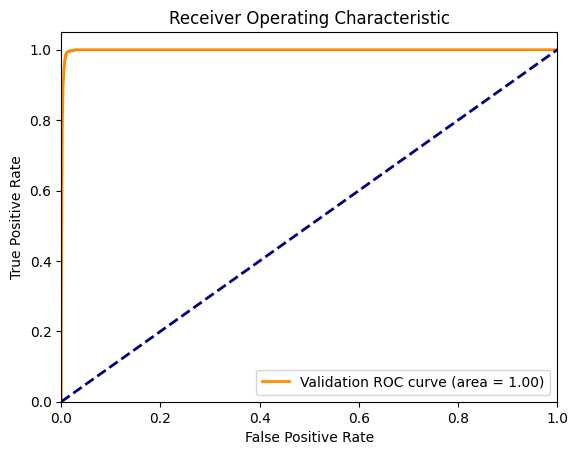

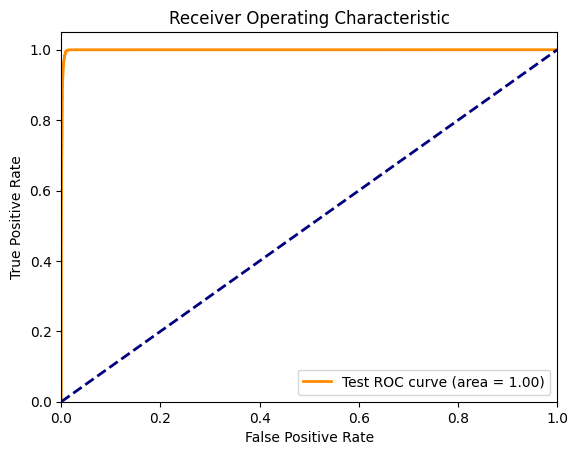

In [85]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
val_probabilities = xgb_model_2.predict_proba(X_val_selected)[:, 1]
test_probabilities = xgb_model_2.predict_proba(X_test_selected)[:, 1]

# Calculate AUROC for validation set
val_auroc = roc_auc_score(y_val_resampled, val_probabilities)
print("Validation AUROC:", val_auroc)

# Calculate AUROC for test set
test_auroc = roc_auc_score(y_test, test_probabilities)
print("Test AUROC:", test_auroc)

# Plot ROC curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val_resampled, val_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='Validation ROC curve (area = %0.2f)' % val_auroc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Test ROC curve (area = %0.2f)' % test_auroc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [86]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Load the preprocessed data
X_train = pd.read_csv('../data/processed/X_train.csv')
X_val = pd.read_csv('../data/processed/X_val.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train_resampled = pd.read_csv('../data/processed/y_train.csv').iloc[:, 0]
y_val_resampled = pd.read_csv('../data/processed/y_val.csv').iloc[:, 0]
y_test = pd.read_csv('../data/processed/y_test.csv')
coefficients = pd.DataFrame({
    'Feature': ['adrtg', 'Min_per', 'AST_per', 'twoPM', 'obpm', 'twoPA', 'stl_per', 'dunksmiss_dunksmade', 'ast',
                'usg', 'midmade_midmiss', 'TS_per', 'adjoe', 'rimmade', 'midmade', 'porpag', 'drtg', 'dgbpm',
                'dunksmade', 'stops', 'ogbpm', 'eFG', 'dbpm', 'TO_per', 'pfr', 'mp', 'rimmade_rimmiss', 'TPM',
                'dunks_ratio', 'GP', 'bpm', 'Rec_Rank', 'twoP_per', 'FT_per', 'FTA', 'mid_ratio', 'dreb', 'DRB_per',
                'dporpag', 'blk_per', 'gbpm', 'stl', 'oreb', 'ast_tov', 'FTM', 'ftr', 'rim_ratio', 'blk', 'treb',
                'TPA', 'TP_per', 'pick', 'ORB_per', 'pts', 'Ortg'],
    'Absolute Coefficient': [3.340078, 3.542694, 2.779246, 2.558382, 2.441382, 2.395607, 2.205659, 2.131396,
                             2.092174, 2.086758, 2.043614, 1.923499, 1.795148, 1.754931, 1.675424, 1.623246,
                             1.584561, 1.505753, 1.505267, 1.457823, 1.264243, 1.249943, 1.243752, 1.079634,
                             1.048334, 0.984514, 0.927019, 0.904347, 0.875047, 0.861829, 0.839320, 0.789912,
                             0.597381, 0.575458, 0.528011, 0.525412, 0.498164, 0.436940, 0.426927, 0.421211,
                             0.377454, 0.369609, 0.337747, 0.287269, 0.248238, 0.246318, 0.204145, 0.192189,
                             0.168635, 0.151730, 0.151492, 0.139234, 0.088484, 0.086800, 0.042992]
})

# Set a threshold for absolute coefficient values
threshold = 0.04

# Select features with absolute coefficient values above the threshold
selected_features = coefficients[coefficients['Absolute Coefficient'] > threshold]['Feature'].tolist()

# Create DataFrames with selected features
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

# Create XGBoost model
xgb_model_grid = XGBClassifier()

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'reg_lambda': [0.1, 1, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model_grid, param_grid=param_grid, scoring='accuracy', cv=3)

# Perform grid search on training data
grid_search.fit(X_train_selected, y_train_resampled)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on validation set
val_predictions = best_model.predict(X_val_selected)
val_accuracy = accuracy_score(y_val_resampled, val_predictions)
val_f1 = f1_score(y_val_resampled, val_predictions)
print("Best Validation Accuracy:", val_accuracy)
print("Best Validation F1 Score:", val_f1)

# Predict on test set
test_predictions = best_model.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1)


Best Validation Accuracy: 0.9814198308439805
Best Validation F1 Score: 0.9811990713342742
Test Accuracy: 0.9857014388489208
Test F1 Score: 0.9855729970057163


In [100]:
print(best_params)
print(best_model)

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300, 'reg_lambda': 0.1}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [107]:
from joblib import dump

dump(best_model_new,  '../models/xgb_model_best_new.joblib')

['../models/xgb_model_best_new.joblib']

In [108]:
selected_features = [
    'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per',
    'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per',
    'stl_per', 'ftr', 'porpag', 'adjoe', 'pfr', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss',
    'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade',
    'dunks_ratio', 'pick', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
    'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts'
]
test = pd.read_csv('../data/raw/test.csv')
# Keep only the selected features in the test dataframe
test_selected = test[selected_features]

In [109]:
loaded_scaler = load('../models/scaler.joblib')
X_tt = loaded_scaler.transform(test_selected)


# Convert scaled array to DataFrame
X_tt_df = pd.DataFrame(X_tt, columns=test_selected.columns)

# Now X_tt_df is a DataFrame containing the scaled data with the appropriate column names
X_tt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GP                   4970 non-null   float64
 1   Min_per              4970 non-null   float64
 2   Ortg                 4970 non-null   float64
 3   usg                  4970 non-null   float64
 4   eFG                  4970 non-null   float64
 5   TS_per               4970 non-null   float64
 6   ORB_per              4970 non-null   float64
 7   DRB_per              4970 non-null   float64
 8   AST_per              4970 non-null   float64
 9   TO_per               4970 non-null   float64
 10  FTM                  4970 non-null   float64
 11  FTA                  4970 non-null   float64
 12  FT_per               4970 non-null   float64
 13  twoPM                4970 non-null   float64
 14  twoPA                4970 non-null   float64
 15  twoP_per             4970 non-null   f

In [110]:
import pandas as pd
import numpy as np

# Load the test data
test = pd.read_csv('../data/raw/test.csv')

# List of features to keep based on the provided dataframe description
coefficients = pd.DataFrame({
    'Feature': ['adrtg', 'Min_per', 'AST_per', 'twoPM', 'obpm', 'twoPA', 'stl_per', 'dunksmiss_dunksmade', 'ast',
                'usg', 'midmade_midmiss', 'TS_per', 'adjoe', 'rimmade', 'midmade', 'porpag', 'drtg', 'dgbpm',
                'dunksmade', 'stops', 'ogbpm', 'eFG', 'dbpm', 'TO_per', 'pfr', 'mp', 'rimmade_rimmiss', 'TPM',
                'dunks_ratio', 'GP', 'bpm', 'Rec_Rank', 'twoP_per', 'FT_per', 'FTA', 'mid_ratio', 'dreb', 'DRB_per',
                'dporpag', 'blk_per', 'gbpm', 'stl', 'oreb', 'ast_tov', 'FTM', 'ftr', 'rim_ratio', 'blk', 'treb',
                'TPA', 'TP_per', 'pick', 'ORB_per', 'pts', 'Ortg'],
    'Absolute Coefficient': [3.340078, 3.542694, 2.779246, 2.558382, 2.441382, 2.395607, 2.205659, 2.131396,
                             2.092174, 2.086758, 2.043614, 1.923499, 1.795148, 1.754931, 1.675424, 1.623246,
                             1.584561, 1.505753, 1.505267, 1.457823, 1.264243, 1.249943, 1.243752, 1.079634,
                             1.048334, 0.984514, 0.927019, 0.904347, 0.875047, 0.861829, 0.839320, 0.789912,
                             0.597381, 0.575458, 0.528011, 0.525412, 0.498164, 0.436940, 0.426927, 0.421211,
                             0.377454, 0.369609, 0.337747, 0.287269, 0.248238, 0.246318, 0.204145, 0.192189,
                             0.168635, 0.151730, 0.151492, 0.139234, 0.088484, 0.086800, 0.042992]
})
# Set a threshold for absolute coefficient values
threshold = 0.04

# Select features with absolute coefficient values above the threshold
selected_features = coefficients[coefficients['Absolute Coefficient'] > threshold]['Feature'].tolist()


# Keep only the selected features in the test dataframe
test_selected = X_tt_df[selected_features]

# Now you can use the 'test_selected' dataframe for further processing or testing


In [111]:
test_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   adrtg                4969 non-null   float64
 1   Min_per              4970 non-null   float64
 2   AST_per              4970 non-null   float64
 3   twoPM                4970 non-null   float64
 4   obpm                 4969 non-null   float64
 5   twoPA                4970 non-null   float64
 6   stl_per              4970 non-null   float64
 7   dunksmiss_dunksmade  4722 non-null   float64
 8   ast                  4970 non-null   float64
 9   usg                  4970 non-null   float64
 10  midmade_midmiss      4722 non-null   float64
 11  TS_per               4970 non-null   float64
 12  adjoe                4970 non-null   float64
 13  rimmade              4722 non-null   float64
 14  midmade              4722 non-null   float64
 15  porpag               4970 non-null   f

In [112]:
test_selected.to_csv('../data/processed/final_test_set.csv', index=False)


In [113]:
import pandas as pd
from joblib import load
from sklearn.preprocessing import StandardScaler

# Load the saved model
xgb_loaded_model = load('../models/xgb_model_best_new.joblib')







In [114]:
predicted_probabilities_xgb = xgb_loaded_model.predict_proba(test_selected)

testing = pd.read_csv('../data/raw/test.csv')


xgb_result_df = pd.DataFrame({
    'player_id': testing['player_id'] ,
    'drafted_probability': predicted_probabilities_xgb[:, 1]
})

# Save the predicted probabilities to a CSV file
xgb_result_df.to_csv('../data/interim/week_1_best_model_predicted_probabilities.csv', index=False)
xgb_result_df.to_csv('../reports/figures/final_model_outputs_week4.csv', index=False)

In [105]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Load the preprocessed data
X_train = pd.read_csv('../data/processed/X_train.csv')
X_val = pd.read_csv('../data/processed/X_val.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train_resampled = pd.read_csv('../data/processed/y_train.csv').iloc[:, 0]
y_val_resampled = pd.read_csv('../data/processed/y_val.csv').iloc[:, 0]
y_test = pd.read_csv('../data/processed/y_test.csv')
coefficients = pd.DataFrame({
    'Feature': ['adrtg', 'Min_per', 'AST_per', 'twoPM', 'obpm', 'twoPA', 'stl_per', 'dunksmiss_dunksmade', 'ast',
                'usg', 'midmade_midmiss', 'TS_per', 'adjoe', 'rimmade', 'midmade', 'porpag', 'drtg', 'dgbpm',
                'dunksmade', 'stops', 'ogbpm', 'eFG', 'dbpm', 'TO_per', 'pfr', 'mp', 'rimmade_rimmiss', 'TPM',
                'dunks_ratio', 'GP', 'bpm', 'Rec_Rank', 'twoP_per', 'FT_per', 'FTA', 'mid_ratio', 'dreb', 'DRB_per',
                'dporpag', 'blk_per', 'gbpm', 'stl', 'oreb', 'ast_tov', 'FTM', 'ftr', 'rim_ratio', 'blk', 'treb',
                'TPA', 'TP_per', 'pick', 'ORB_per', 'pts', 'Ortg'],
    'Absolute Coefficient': [3.340078, 3.542694, 2.779246, 2.558382, 2.441382, 2.395607, 2.205659, 2.131396,
                             2.092174, 2.086758, 2.043614, 1.923499, 1.795148, 1.754931, 1.675424, 1.623246,
                             1.584561, 1.505753, 1.505267, 1.457823, 1.264243, 1.249943, 1.243752, 1.079634,
                             1.048334, 0.984514, 0.927019, 0.904347, 0.875047, 0.861829, 0.839320, 0.789912,
                             0.597381, 0.575458, 0.528011, 0.525412, 0.498164, 0.436940, 0.426927, 0.421211,
                             0.377454, 0.369609, 0.337747, 0.287269, 0.248238, 0.246318, 0.204145, 0.192189,
                             0.168635, 0.151730, 0.151492, 0.139234, 0.088484, 0.086800, 0.042992]
})

# Set a threshold for absolute coefficient values
threshold = 0.04

# Select features with absolute coefficient values above the threshold
selected_features = coefficients[coefficients['Absolute Coefficient'] > threshold]['Feature'].tolist()

# Create DataFrames with selected features
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

# Create XGBoost model
xgb_model_grid = XGBClassifier()

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'learning_rate': [0.01, 0.18, 0.2, 0.22, 0.25],
    'max_depth': [2, 4, 5, 6],
    'n_estimators': [250, 300, 310],
    'reg_lambda': [0.1, 0.15, 0.2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model_grid, param_grid=param_grid, scoring='accuracy', cv=3)

# Perform grid search on training data
grid_search.fit(X_train_selected, y_train_resampled)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model_new = grid_search.best_estimator_

# Evaluate the best model on validation set
val_predictions = best_model_new.predict(X_val_selected)
val_accuracy = accuracy_score(y_val_resampled, val_predictions)
val_f1 = f1_score(y_val_resampled, val_predictions)
print("Best Validation Accuracy:", val_accuracy)
print("Best Validation F1 Score:", val_f1)

# Predict on test set
test_predictions = best_model_new.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1)

Best Validation Accuracy: 0.9816897606622278
Best Validation F1 Score: 0.9814772675556365
Test Accuracy: 0.9868255395683453
Test F1 Score: 0.9867198477088337


In [106]:
print(best_params)

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 310, 'reg_lambda': 0.2}
